In [124]:
import numpy as np
import matplotlib.pyplot as plt
from src.util import color_code_cells, calculate_convexity_ratio
np.random.seed(42)

In [133]:
def create_cirle_mask(lattice_size, center, radius):
    Y, X = np.ogrid[:lattice_size[0], :lattice_size[1]]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius
    return mask.astype(int)

def make_sqaure(lattice_size, top_left, side_length):
    lattice = np.zeros(lattice_size, dtype=int)
    lattice[top_left[1]:top_left[1]+side_length, top_left[0]:top_left[0]+side_length] = 1
    return lattice

def make_hexagon(lattice_size, center, side_length):
    lattice = np.zeros(lattice_size, dtype=int)
    for i in range(lattice_size[0]):
        for j in range(lattice_size[1]):
            dx = abs(j - center[0])
            dy = abs(i - center[1])
            if dy <= np.sqrt(3) * side_length / 2 and dx <= side_length and (np.sqrt(3) * dx + dy) <= np.sqrt(3) * side_length:
                lattice[i, j] = 1
    return lattice

def make_voronoi(lattice_size, num_points):
    points = np.random.randint(0, min(lattice_size), size=(num_points, 2), seed=42)
    lattice = np.zeros(lattice_size, dtype=int)
    for i in range(lattice_size[0]):
        for j in range(lattice_size[1]):
            distances = np.linalg.norm(points - np.array([j, i]), axis=1)
            closest_point = np.argmin(distances)
            lattice[i, j] = closest_point + 1
    return lattice

def chop_off_part_circle(lattice, center, radius):
    lattice = lattice.copy()
    Y, X = np.ogrid[:lattice.shape[0], :lattice.shape[1]]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center >= radius
    chopped_lattice = lattice * mask
    return chopped_lattice

lattice_size = (150, 150)
center = (lattice_size[0] // 2, lattice_size[1] // 2)
radius = 50

sqaure = make_sqaure(lattice_size, (50, 50), 60)
hexagon = make_hexagon(lattice_size, center, 60)
regular_circle = create_cirle_mask(lattice_size, center, radius)
chopped_circle = create_cirle_mask(lattice_size, center, radius)
voro = make_voronoi(lattice_size, 20)




TypeError: randint() got an unexpected keyword argument 'seed'

In [134]:
centers = [(lattice_size[0], lattice_size[0]), (0,0), (lattice_size[0], 0), (0, lattice_size[0]), 
           (center[0], 0), (0, center[1]), (lattice_size[0], center[1]), (center[0], lattice_size[1]),
           ]
radi = [0, 0, 0, 0, 
        55, 55, 55, 55]
for c, r in zip(centers, radi):
    chopped_circle = chop_off_part_circle(chopped_circle, c, r)

In [131]:
print(calculate_convexity_ratio(sqaure, target_value=1))
print(calculate_convexity_ratio(hexagon, target_value=1))
print(calculate_convexity_ratio(regular_circle, target_value=1))
print(calculate_convexity_ratio(chopped_circle, target_value=1))


1.0
0.9897817988291644
0.9869165932821738
0.6390082644628099


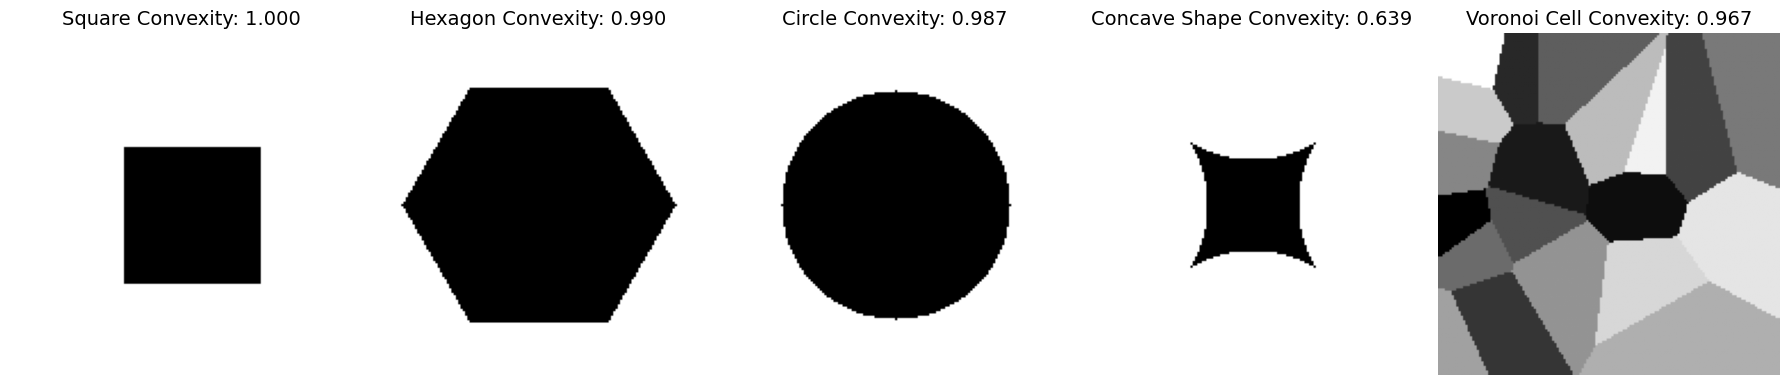

In [132]:
fig, ax = plt.subplots(1, 5,figsize=(18, 7))
ax[0].imshow(sqaure, cmap='gray_r')
ax[1].imshow(hexagon, cmap='gray_r')
ax[2].imshow(regular_circle, cmap='gray_r')
ax[3].imshow(chopped_circle, cmap='gray_r')
ax[4].imshow(voro, cmap='gray_r')
ax[0].set_title(f'Square Convexity: {calculate_convexity_ratio(sqaure, target_value=1):.3f}', fontsize=14)
ax[1].set_title(f'Hexagon Convexity: {calculate_convexity_ratio(hexagon, target_value=1):.3f}', fontsize=14)
ax[2].set_title(f'Circle Convexity: {calculate_convexity_ratio(regular_circle, target_value=1):.3f}', fontsize=14)
ax[3].set_title(f'Concave Shape Convexity: {calculate_convexity_ratio(chopped_circle, target_value=1):.3f}', fontsize=14)
ax[4].set_title(f'Voronoi Cell Convexity: {calculate_convexity_ratio(voro, target_value=1):.3f}', fontsize=14)
for a in ax:
    a.axis('off')
fig.tight_layout()